In [5]:
import pandas as pd

In [6]:
import tarfile
dataset=tarfile.open('pet_animal.tgz')

In [7]:
#Print out all the directories
for name in dataset.getnames():
    tar_member = dataset.getmember(name)
    if(tar_member.isdir()):
         print(name)

1577957291_deeplearningwithkerasandtensorflow
1577957291_deeplearningwithkerasandtensorflow/data
1577957291_deeplearningwithkerasandtensorflow/data/train
1577957291_deeplearningwithkerasandtensorflow/data/train/cats
1577957291_deeplearningwithkerasandtensorflow/data/train/dogs
1577957291_deeplearningwithkerasandtensorflow/data/test
1577957291_deeplearningwithkerasandtensorflow/data/test/dogs
1577957291_deeplearningwithkerasandtensorflow/data/test/cats


In [8]:
#We will build a pandas dataset
import pandas as pd
df = pd.DataFrame(columns=['class','dir','image_file'])

In [9]:
#Run through tarfile members 
for name in dataset.getnames():
    
    tar_mem = dataset.getmember(name)
    
    #Check if it is a file
    if(tar_mem.isfile() and name.endswith('.jpg')):
        #Build directory and class info
        im_dir = name[0:name.rfind('/')]
        im_class = im_dir[im_dir.rfind('/')+1:]
        #Add record to the dataframe
        df.loc[df.shape[0]] = [im_class, im_dir, name]


In [10]:
#Check contents of the dataframe
print('Total images: ', df.shape[0])
df.head()

Total images:  60


,class,dir,image_file
0,cats,1577957291_deeplearningwithkerasandtensorflow/...,1577957291_deeplearningwithkerasandtensorflow/...
1,cats,1577957291_deeplearningwithkerasandtensorflow/...,1577957291_deeplearningwithkerasandtensorflow/...
2,cats,1577957291_deeplearningwithkerasandtensorflow/...,1577957291_deeplearningwithkerasandtensorflow/...
3,cats,1577957291_deeplearningwithkerasandtensorflow/...,1577957291_deeplearningwithkerasandtensorflow/...
4,cats,1577957291_deeplearningwithkerasandtensorflow/...,1577957291_deeplearningwithkerasandtensorflow/...


In [11]:
#images by class
print(df.groupby(['class']).size())

class
cats    30
dogs    30
dtype: int64


In [12]:
#extract data
dataset.extractall(path='data/')

### Create training and test dataset

In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
train_df.to_csv('data/train/train.csv',index=False)
test_df.to_csv('data/test/test.csv', index=False)

In [15]:
train_df=pd.read_csv('data/train/train.csv')
test_df=pd.read_csv('data/test/test.csv')

### Visulaze the image

In [16]:
#Check out few file names for the photos - 

#for Linux uncomment the following line
!ls data/train/dogs/ | head -3
!ls data/test/dogs/ | head -3
#For windows, uncomment the following line
#!dir data\flower_photos\daisy /a-d

10.jpg
11.jpg
12.jpg
101.jpg
102.jpg
103.jpg


In [17]:
import tensorflow as tf
#tf.reset_default_graph()

/home/rajesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rajesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rajesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rajesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

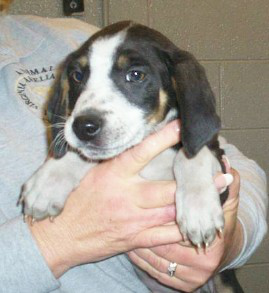

In [18]:
#Load an image using Keras image class
animal_file = 'data/train/dogs/10.jpg'
animal_image = tf.keras.preprocessing.image.load_img(animal_file)

#Inspect image
animal_image

In [19]:
type(animal_image)

PIL.JpegImagePlugin.JpegImageFile

In [20]:
animal_image2=tf.keras.preprocessing.image.load_img('data/train/dogs/11.jpg')

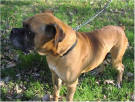

In [21]:
animal_image2

In [22]:
animal_image.size

(269, 293)

In [23]:
animal_image2.size

(135, 102)

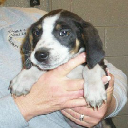

In [24]:
#So it is concluding that all the image having the different size so need to reshape all in the same shape
animal_image=animal_image.resize([128,128])
animal_image

### converting image to numpy array for ML


In [26]:
animal_array=tf.keras.preprocessing.image.img_to_array(animal_image)
animal_array

array([[[144., 114.,  60.],
        [147., 111.,  53.],
        [137.,  95.,  35.],
        ...,
        [133., 118.,  95.],
        [135., 120.,  97.],
        [135., 120.,  97.]],

       [[133., 105.,  57.],
        [140., 107.,  56.],
        [139., 102.,  49.],
        ...,
        [135., 120.,  97.],
        [135., 120.,  97.],
        [133., 118.,  95.]],

       [[102.,  74.,  34.],
        [120.,  87.,  42.],
        [129.,  95.,  49.],
        ...,
        [136., 121.,  98.],
        [139., 124., 101.],
        [139., 124., 101.]],

       ...,

       [[188., 206., 216.],
        [191., 209., 219.],
        [187., 205., 215.],
        ...,
        [100.,  94.,  80.],
        [103.,  95.,  82.],
        [ 96.,  88.,  75.]],

       [[179., 199., 210.],
        [195., 215., 226.],
        [193., 213., 224.],
        ...,
        [ 99.,  96.,  81.],
        [ 99.,  96.,  81.],
        [ 98.,  92.,  78.]],

       [[173., 193., 204.],
        [185., 205., 216.],
        [184., 2

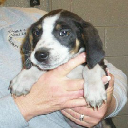

In [27]:
new_img=tf.keras.preprocessing.image.array_to_img(animal_array)
new_img

### Image Classification


In [28]:
#Get the Class names
class_name=train_df['class'].unique().tolist()
print('animal classes ',class_name)

animal classes  ['dogs', 'cats']


In [29]:
#Defining some Parameters 
img_size=128
img_depth=3

### Build The batch Generator

In [30]:
print(test_df.groupby(['class']).size())

class
cats    7
dogs    5
dtype: int64


In [31]:
import numpy as np

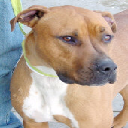

In [33]:
#Load image
batchsize=10
batch_nums = np.random.randint(0,train_df.shape[0], batchsize)

batch_nums
flower_image =  tf.keras.preprocessing.image.load_img('data/' + train_df.loc[batch_nums[0]]['image_file'],
                                                                  target_size=(img_size, img_size))

flower_image
                                                                  

In [34]:
def batch_generator(df, batchsize=10):   
    
    while True:       
                
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0], batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_name)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_name.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_name))
            
            #Update batch images and class arrays
            batch_images[i] = animal_image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels          

### Build CNN Model

In [51]:
#initilizing the Model, reshape & normalize data
model = tf.keras.models.Sequential()

#Add the Model Layers
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3)))
## Add the First convolutional Layers
model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu'))
#Adding the MaxPooling layers
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))   # is used for the Down sizing
# Adding the another convoluton Layers
model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'))
#Adding the Polling with the stride 2
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))   # is used for the Down sizing

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
#Adding the Droput Layers
model.add(tf.keras.layers.Dropout(0.4))

#Add the output Layers
model.add(tf.keras.layers.Dense(len(class_name),activation='softmax'))


In [52]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v2_2 (Ba (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 53824)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [54]:
#Create train and test generator
batchsize = 5
train_generator = batch_generator(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batchsize=batchsize)

In [55]:
test_df.shape[0]
#batchsize

12

In [56]:
validation_steps=test_df.shape[0]//batchsize
validation_steps
train_generator

<generator object batch_generator at 0x7f2d5c426c50>

In [57]:
model.fit_generator(train_generator, 
                          epochs=100,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/100
9/9 [==============================] - 3s 330ms/step - loss: 0.9060 - accuracy: 0.6444 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 1s 93ms/step - loss: 0.6880 - accuracy: 0.6000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
9/9 [==============================] - 1s 96ms/step - loss: 0.6933 - accuracy: 0.4889 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
9/9 [==============================] - 1s 99ms/step - loss: 0.6940 - accuracy: 0.4222 - val_loss: 0.6936 - val_accuracy: 0.4000
Epoch 5/100
9/9 [==============================] - 1s 98ms/step - loss: 0.6930 - accuracy: 0.5778 - val_loss: 0.6941 - val_accuracy: 0.3000
Epoch 6/100
9/9 [==============================] - 1s 103ms/step - loss: 0.6932 - accuracy: 0.5111 - val_loss: 0.6951 - val_accuracy: 0.3000
Epoch 7/100
9/9 [==============================] - 1s 98ms/step - loss: 0.6937 - accuracy: 0.4444 - val_loss: 0.6967 - val_accuracy: 0.1000
Epoch 8/100
9/9 [=

In [142]:
model.fit_generator(train_generator, 
                          epochs=200,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/200
9/9 [==============================] - 1s 104ms/step - loss: 0.6876 - accuracy: 0.6000 - val_loss: 0.6868 - val_accuracy: 0.6000
Epoch 2/200
9/9 [==============================] - 1s 98ms/step - loss: 0.6916 - accuracy: 0.5111 - val_loss: 0.7084 - val_accuracy: 0.3000
Epoch 3/200
9/9 [==============================] - 1s 99ms/step - loss: 0.6918 - accuracy: 0.5111 - val_loss: 0.7164 - val_accuracy: 0.2000
Epoch 4/200
9/9 [==============================] - 1s 99ms/step - loss: 0.6882 - accuracy: 0.5778 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 5/200
9/9 [==============================] - 1s 100ms/step - loss: 0.7010 - accuracy: 0.4222 - val_loss: 0.7098 - val_accuracy: 0.3000
Epoch 6/200
9/9 [==============================] - 1s 101ms/step - loss: 0.7018 - accuracy: 0.4000 - val_loss: 0.6867 - val_accuracy: 0.6000
Epoch 7/200
9/9 [==============================] - 1s 100ms/step - loss: 0.6953 - accuracy: 0.4667 - val_loss: 0.7002 - val_accuracy: 0.4000
Epoch 8/200
9/9 

Epoch 59/200
9/9 [==============================] - 1s 106ms/step - loss: 0.6942 - accuracy: 0.5111 - val_loss: 0.7035 - val_accuracy: 0.4000
Epoch 60/200
9/9 [==============================] - 1s 106ms/step - loss: 0.6960 - accuracy: 0.4889 - val_loss: 0.7126 - val_accuracy: 0.3000
Epoch 61/200
9/9 [==============================] - 1s 106ms/step - loss: 0.6889 - accuracy: 0.5556 - val_loss: 0.7036 - val_accuracy: 0.4000
Epoch 62/200
9/9 [==============================] - 1s 106ms/step - loss: 0.6969 - accuracy: 0.4667 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 63/200
9/9 [==============================] - 1s 104ms/step - loss: 0.6713 - accuracy: 0.7556 - val_loss: 0.6846 - val_accuracy: 0.6000
Epoch 64/200
9/9 [==============================] - 1s 108ms/step - loss: 0.6970 - accuracy: 0.4667 - val_loss: 0.7146 - val_accuracy: 0.3000
Epoch 65/200
9/9 [==============================] - 1s 113ms/step - loss: 0.6955 - accuracy: 0.4889 - val_loss: 0.7046 - val_accuracy: 0.4000
Epoch 

9/9 [==============================] - 1s 112ms/step - loss: 0.6953 - accuracy: 0.4889 - val_loss: 0.7112 - val_accuracy: 0.3000
Epoch 174/200
9/9 [==============================] - 1s 110ms/step - loss: 0.6990 - accuracy: 0.4444 - val_loss: 0.6858 - val_accuracy: 0.6000
Epoch 175/200
9/9 [==============================] - 1s 111ms/step - loss: 0.6928 - accuracy: 0.5111 - val_loss: 0.7174 - val_accuracy: 0.2000
Epoch 176/200
9/9 [==============================] - 1s 111ms/step - loss: 0.6873 - accuracy: 0.5778 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 177/200
9/9 [==============================] - 1s 110ms/step - loss: 0.6920 - accuracy: 0.5333 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 178/200
9/9 [==============================] - 1s 111ms/step - loss: 0.6912 - accuracy: 0.5333 - val_loss: 0.7026 - val_accuracy: 0.4000
Epoch 179/200
9/9 [==============================] - 1s 111ms/step - loss: 0.6963 - accuracy: 0.4667 - val_loss: 0.6773 - val_accuracy: 0.7000
Epoch 180/200

In [144]:
model.fit_generator(train_generator, 
                          epochs=300,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/300
9/9 [==============================] - 1s 109ms/step - loss: 0.6772 - accuracy: 0.6444 - val_loss: 0.7077 - val_accuracy: 0.4000
Epoch 2/300
9/9 [==============================] - 1s 121ms/step - loss: 0.6946 - accuracy: 0.5111 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 3/300
9/9 [==============================] - 1s 114ms/step - loss: 0.6994 - accuracy: 0.4667 - val_loss: 0.7212 - val_accuracy: 0.3000
Epoch 4/300
9/9 [==============================] - 1s 111ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 5/300
9/9 [==============================] - 1s 111ms/step - loss: 0.6878 - accuracy: 0.5556 - val_loss: 0.6823 - val_accuracy: 0.6000
Epoch 6/300
9/9 [==============================] - 1s 111ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7214 - val_accuracy: 0.3000
Epoch 7/300
9/9 [==============================] - 1s 114ms/step - loss: 0.7018 - accuracy: 0.4444 - val_loss: 0.6824 - val_accuracy: 0.6000
Epoch 8/300
9

Epoch 59/300
9/9 [==============================] - 1s 118ms/step - loss: 0.6920 - accuracy: 0.5778 - val_loss: 0.6953 - val_accuracy: 0.4000
Epoch 60/300
9/9 [==============================] - 1s 117ms/step - loss: 0.6945 - accuracy: 0.4444 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 61/300
9/9 [==============================] - 1s 117ms/step - loss: 0.6934 - accuracy: 0.4889 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 62/300
9/9 [==============================] - 1s 118ms/step - loss: 0.6911 - accuracy: 0.6000 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 63/300
9/9 [==============================] - 1s 119ms/step - loss: 0.6930 - accuracy: 0.5111 - val_loss: 0.6981 - val_accuracy: 0.3000
Epoch 64/300
9/9 [==============================] - 1s 117ms/step - loss: 0.6925 - accuracy: 0.5333 - val_loss: 0.6958 - val_accuracy: 0.4000
Epoch 65/300
9/9 [==============================] - 1s 117ms/step - loss: 0.6940 - accuracy: 0.4667 - val_loss: 0.6881 - val_accuracy: 0.7000
Epoch 

9/9 [==============================] - 1s 120ms/step - loss: 0.6911 - accuracy: 0.5333 - val_loss: 0.6837 - val_accuracy: 0.6000
Epoch 174/300
9/9 [==============================] - 1s 120ms/step - loss: 0.6959 - accuracy: 0.4889 - val_loss: 0.7161 - val_accuracy: 0.3000
Epoch 175/300
9/9 [==============================] - 1s 120ms/step - loss: 0.6887 - accuracy: 0.5556 - val_loss: 0.7162 - val_accuracy: 0.3000
Epoch 176/300
9/9 [==============================] - 1s 120ms/step - loss: 0.6959 - accuracy: 0.4889 - val_loss: 0.7054 - val_accuracy: 0.4000
Epoch 177/300
9/9 [==============================] - 1s 120ms/step - loss: 0.6886 - accuracy: 0.5556 - val_loss: 0.7053 - val_accuracy: 0.4000
Epoch 178/300
9/9 [==============================] - 1s 121ms/step - loss: 0.7005 - accuracy: 0.4444 - val_loss: 0.6841 - val_accuracy: 0.6000
Epoch 179/300
9/9 [==============================] - 1s 118ms/step - loss: 0.6864 - accuracy: 0.5778 - val_loss: 0.6841 - val_accuracy: 0.6000
Epoch 180/300

9/9 [==============================] - 1s 123ms/step - loss: 0.6992 - accuracy: 0.4667 - val_loss: 0.7072 - val_accuracy: 0.4000
Epoch 288/300
9/9 [==============================] - 1s 121ms/step - loss: 0.6857 - accuracy: 0.5778 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 289/300
9/9 [==============================] - 1s 119ms/step - loss: 0.7042 - accuracy: 0.4222 - val_loss: 0.6713 - val_accuracy: 0.7000
Epoch 290/300
9/9 [==============================] - 1s 121ms/step - loss: 0.6831 - accuracy: 0.6000 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 291/300
9/9 [==============================] - 1s 122ms/step - loss: 0.6989 - accuracy: 0.4667 - val_loss: 0.7066 - val_accuracy: 0.4000
Epoch 292/300
9/9 [==============================] - 1s 120ms/step - loss: 0.6911 - accuracy: 0.5333 - val_loss: 0.7062 - val_accuracy: 0.4000
Epoch 293/300
9/9 [==============================] - 1s 123ms/step - loss: 0.6884 - accuracy: 0.5556 - val_loss: 0.7063 - val_accuracy: 0.4000
Epoch 294/300

### As we can see overfitting going to be happened from above observation

In [40]:
# Batch generator for image Augmentation

def batch_generator_image_Augmentation(df, batchsize=10, train_mode=True):   
    
    img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
    
    while True:       
        
        
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0],batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_name)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            if(train_mode):
                #Apply transform
                flower_image =  img_generator.random_transform(flower_image)
            
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_name.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_name))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels          

In [41]:
#initilizing the Model, reshape & normalize data
model = tf.keras.models.Sequential()

#Add the Model Layers
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3)))
## Add the First convolutional Layers
model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu'))
#Adding the MaxPooling layers
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))   # is used for the Down sizing
# Adding the another convoluton Layers
model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'))
#Adding the Polling with the stride 2
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))   # is used for the Down sizing

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
#Adding the Droput Layers
model.add(tf.keras.layers.Dropout(0.4))

#Add the output Layers
model.add(tf.keras.layers.Dense(len(class_name),activation='softmax'))


In [59]:
#Create train and test generator
batchsize = 10
train_generator = batch_generator_image_Augmentation(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator_image_Augmentation(test_df, batchsize=batchsize, train_mode=False)

In [61]:
model.fit_generator(train_generator, 
                          epochs=200,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/200
4/4 [==============================] - 1s 205ms/step - loss: 0.6809 - accuracy: 0.6250 - val_loss: 0.7056 - val_accuracy: 0.4000
Epoch 2/200
4/4 [==============================] - 1s 182ms/step - loss: 0.6961 - accuracy: 0.4750 - val_loss: 0.7277 - val_accuracy: 0.2000
Epoch 3/200
4/4 [==============================] - 1s 182ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.7059 - val_accuracy: 0.4000
Epoch 4/200
4/4 [==============================] - 1s 176ms/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.7172 - val_accuracy: 0.3000
Epoch 5/200
4/4 [==============================] - 1s 175ms/step - loss: 0.6832 - accuracy: 0.6000 - val_loss: 0.6721 - val_accuracy: 0.7000
Epoch 6/200
4/4 [==============================] - 1s 174ms/step - loss: 0.6972 - accuracy: 0.4750 - val_loss: 0.7061 - val_accuracy: 0.4000
Epoch 7/200
4/4 [==============================] - 1s 177ms/step - loss: 0.7017 - accuracy: 0.4250 - val_loss: 0.6496 - val_accuracy: 0.9000
Epoch 8/200
4

Epoch 59/200
4/4 [==============================] - 1s 192ms/step - loss: 0.6924 - accuracy: 0.5250 - val_loss: 0.7138 - val_accuracy: 0.2000
Epoch 60/200
4/4 [==============================] - 1s 189ms/step - loss: 0.6894 - accuracy: 0.5750 - val_loss: 0.7005 - val_accuracy: 0.4000
Epoch 61/200
4/4 [==============================] - 1s 196ms/step - loss: 0.6865 - accuracy: 0.6000 - val_loss: 0.7007 - val_accuracy: 0.4000
Epoch 62/200
4/4 [==============================] - 1s 190ms/step - loss: 0.6974 - accuracy: 0.4500 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 63/200
4/4 [==============================] - 1s 192ms/step - loss: 0.6969 - accuracy: 0.4500 - val_loss: 0.7006 - val_accuracy: 0.4000
Epoch 64/200
4/4 [==============================] - 1s 193ms/step - loss: 0.6969 - accuracy: 0.4500 - val_loss: 0.7005 - val_accuracy: 0.4000
Epoch 65/200
4/4 [==============================] - 1s 192ms/step - loss: 0.6918 - accuracy: 0.5250 - val_loss: 0.7070 - val_accuracy: 0.3000
Epoch 

4/4 [==============================] - 1s 199ms/step - loss: 0.6902 - accuracy: 0.5500 - val_loss: 0.6695 - val_accuracy: 0.8000
Epoch 174/200
4/4 [==============================] - 1s 194ms/step - loss: 0.6959 - accuracy: 0.4750 - val_loss: 0.7022 - val_accuracy: 0.4000
Epoch 175/200
4/4 [==============================] - 1s 198ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6858 - val_accuracy: 0.6000
Epoch 176/200
4/4 [==============================] - 1s 199ms/step - loss: 0.6999 - accuracy: 0.4250 - val_loss: 0.6859 - val_accuracy: 0.6000
Epoch 177/200
4/4 [==============================] - 1s 202ms/step - loss: 0.6880 - accuracy: 0.5750 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 178/200
4/4 [==============================] - 1s 197ms/step - loss: 0.6978 - accuracy: 0.4500 - val_loss: 0.7019 - val_accuracy: 0.4000
Epoch 179/200
4/4 [==============================] - 1s 204ms/step - loss: 0.6978 - accuracy: 0.4500 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 180/200

### Image classification with Transfer Learning

### Load Pre-trained Model

In [70]:
def batch_generator_TransferLearning(df, batchsize=10, train_mode=True):   
    
    img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
    
    while True:       
        
        
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0],batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_name)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            if(train_mode):
                #Apply transform
                flower_image =  img_generator.random_transform(flower_image)
            
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_name.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_name))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class
        
        batch_images = tf.keras.applications.resnet50.preprocess_input(batch_images)
        
        yield batch_images, batch_labels          

In [62]:
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(img_size,img_size, img_depth),
                                          weights='imagenet')

/home/rajesh/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 182s 2us/step


In [63]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 64, 64, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [65]:
#get Output layer of Pre0trained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Add output layer
prediction = tf.keras.layers.Dense(len(class_name),activation='softmax')(x)

### Building final model for Classification

In [66]:
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [67]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In [71]:
#Create train and test generator
batchsize = 10
train_generator = batch_generator_TransferLearning(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator_TransferLearning(test_df, batchsize=batchsize, train_mode=False)

In [73]:
final_model.fit_generator(train_generator, 
                          epochs=100,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/100
4/4 [==============================] - 51s 13s/step - loss: 2.6618 - accuracy: 0.6500 - val_loss: 5.2086 - val_accuracy: 0.7000
Epoch 2/100
4/4 [==============================] - 5s 1s/step - loss: 5.4324 - accuracy: 0.7500 - val_loss: 781.3851 - val_accuracy: 0.4000
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: 4.8041 - accuracy: 0.8500 - val_loss: 63292.2617 - val_accuracy: 0.1000
Epoch 4/100
4/4 [==============================] - 5s 1s/step - loss: 5.3185 - accuracy: 0.8000 - val_loss: 1445492.6250 - val_accuracy: 0.4000
Epoch 5/100
4/4 [==============================] - 5s 1s/step - loss: 6.2299 - accuracy: 0.7750 - val_loss: 196248.6562 - val_accuracy: 0.4000
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: 5.1069 - accuracy: 0.5000 - val_loss: 13918.6348 - val_accuracy: 0.2000
Epoch 7/100
4/4 [==============================] - 5s 1s/step - loss: 3.5681 - accuracy: 0.8000 - val_loss: 38986.5430 - val_accuracy: 0.4000
Epoch 8

# Conclussion


### When I used Simple CNN Model My Accuracy reached
loss: 0.7041 - accuracy: 0.4000 - val_loss: 0.6943 - val_accuracy: 0.5000

### When I used the Image Augumentation My Accuracy Reched

 loss: 0.6918 - accuracy: 0.5250 - val_loss: 0.7255 - val_accuracy: 0.1000
 
 ### When I used the Transfer Learning then my Accuracy reched 
 loss: 0.0770 - accuracy: 0.9500 - val_loss: 0.4463 - val_accuracy: 0.8000
